In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path='/content/drive/MyDrive/heart.csv'
df=pd.read_csv(path)
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
df['Sex']=df['Sex'].map({'M':1,'F':0})
df['ExerciseAngina']=df['ExerciseAngina'].map({'N':0,'Y':1})
df=pd.get_dummies(df,columns=['ChestPainType','RestingECG','ST_Slope'],drop_first=True)


In [ ]:
df.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True
5,39,1,120,339,0,170,0,0.0,0,False,True,False,True,False,False,True
6,45,0,130,237,0,170,0,0.0,0,True,False,False,True,False,False,True
7,54,1,110,208,0,142,0,0.0,0,True,False,False,True,False,False,True
8,37,1,140,207,0,130,1,1.5,1,False,False,False,True,False,True,False
9,48,0,120,284,0,120,0,0.0,0,True,False,False,True,False,False,True


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numerical_columns=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
df[numerical_columns]=scaler.fit_transform(df[numerical_columns])

In [ ]:
df.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.244898,1,0.70,0.479270,0,0.788732,0,0.295455,0,True,False,False,True,False,False,True
1,0.428571,0,0.80,0.298507,0,0.676056,0,0.409091,1,False,True,False,True,False,True,False
2,0.183673,1,0.65,0.469320,0,0.267606,0,0.295455,0,True,False,False,False,True,False,True
3,0.408163,0,0.69,0.354892,0,0.338028,1,0.465909,1,False,False,False,True,False,True,False
4,0.530612,1,0.75,0.323383,0,0.436620,0,0.295455,0,False,True,False,True,False,False,True
5,0.224490,1,0.60,0.562189,0,0.774648,0,0.295455,0,False,True,False,True,False,False,True
6,0.346939,0,0.65,0.393035,0,0.774648,0,0.295455,0,True,False,False,True,False,False,True
7,0.530612,1,0.55,0.344942,0,0.577465,0,0.295455,0,True,False,False,True,False,False,True
8,0.183673,1,0.70,0.343284,0,0.492958,1,0.465909,1,False,False,False,True,False,True,False
9,0.408163,0,0.60,0.470978,0,0.422535,0,0.295455,0,True,False,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
y_pred=model.predict(x_test)

print("Accuracy_score: ",accuracy_score(y_test,y_pred))
print("Classification_report: ",classification_report(y_test,y_pred))

Accuracy_score:  0.875
Classification_report:                precision    recall  f1-score   support

           0       0.86      0.86      0.86       164
           1       0.89      0.89      0.89       204

    accuracy                           0.88       368
   macro avg       0.87      0.87      0.87       368
weighted avg       0.88      0.88      0.88       368



In [ ]:
def predict_heart_disease(input_data):
    # Convert input into a DataFrame
    input_df = pd.DataFrame([input_data])

    # Apply same preprocessing as training data
    input_df['Sex'] = input_df['Sex'].map({'M': 1, 'F': 0})
    input_df['ExerciseAngina'] = input_df['ExerciseAngina'].map({'Y': 1, 'N': 0})
    input_df = pd.get_dummies(input_df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

    # Ensure the same column structure as training data
    input_df = input_df.reindex(columns=X.columns, fill_value=0)

    # Normalize numerical features
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict
    return model.predict(input_df)
age=int(input("enter the age"))
gender=input("enter the gender")
chest_pain=input("enter the chest pain type")
resting_bp=int(input("enter the resting bp"))
cholesterol=int(input("enter the cholesterol"))
fasting_bs=int(input("enter the fasting bs"))
resting_ecg=input("enter the resting ecg")
max_hr=int(input("enter the max hr"))
exercise_angina=input("enter the exercise angina")
oldpeak=float(input("enter the oldpeak"))
st_slope=input("enter the st slope")

# Example input
new_data = {
    'Age': age, 'Sex':gender, 'ChestPainType': chest_pain, 'RestingBP': resting_bp,
    'Cholesterol': cholesterol, 'FastingBS': fasting_bs, 'RestingECG': resting_ecg,
    'MaxHR': max_hr, 'ExerciseAngina': exercise_angina, 'Oldpeak': oldpeak, 'ST_Slope': st_slope
}

print("Prediction:", predict_heart_disease(new_data))


enter the age40
enter the genderM
enter the chest pain typeATA
enter the resting bp140
enter the cholesterol289
enter the fasting bs0
enter the resting ecgNormal
enter the max hr172
enter the exercise anginaN
enter the oldpeak0
enter the st slopeUp
Prediction: [1]


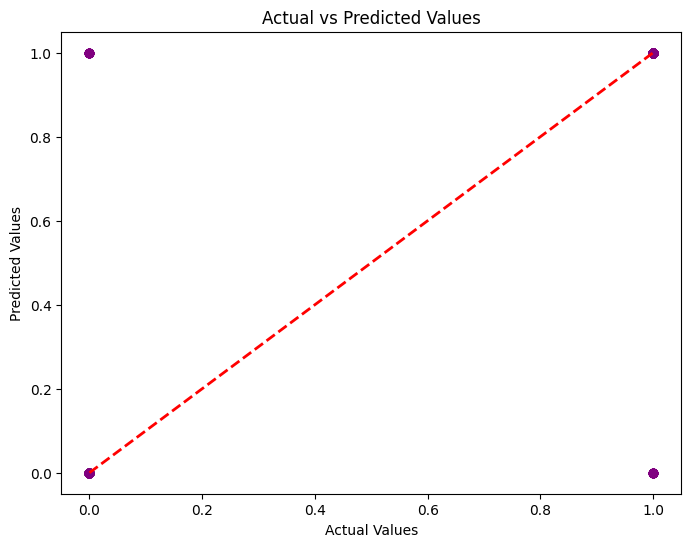

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


<ipython-input-62-1dec6381b697>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


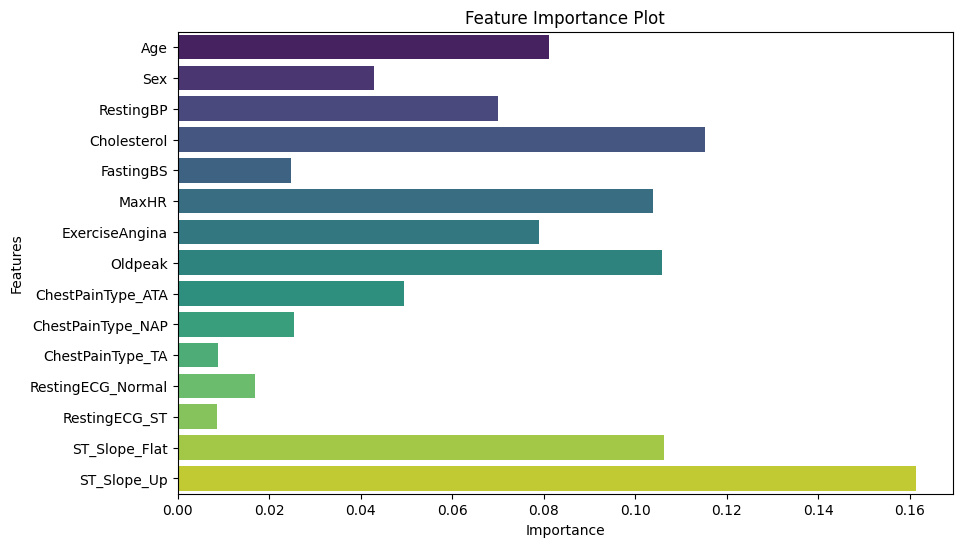

In [ ]:
import pandas as pd

# Get feature importance
feature_importance = model.feature_importances_
features = x_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()


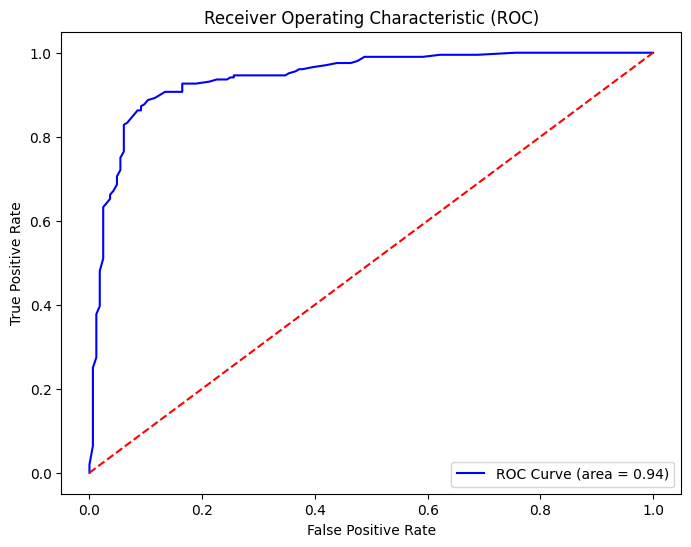

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC Curve
y_prob = model.predict_proba(x_test)[:, 1]  # Probability for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pickle


filename = 'random_forest_model.sav'
pickle.dump(model, open(filename, 'wb'))

print(f"Model saved successfully as {filename}")


Model saved successfully as random_forest_model.sav


In [ ]:
from sklearn.metrics import accuracy_score
loaded_model = pickle.load(open('random_forest_model.sav', 'rb'))

print("Model loaded successfully!")

y_pred = loaded_model.predict(x_test)
print("Predictions:", y_pred)
accuracy_score=accuracy_score(y_test,y_pred)
print("Accuracy Score: ",accuracy_score)

Model loaded successfully!
Predictions: [1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0
 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0
 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0
 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1
 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1]
Accuracy Score:  0.8876811594202898
